# Occupational Therapy — Notebook

For many practising engineers, their notebook plays a key role in helping them keep their thoughts on track when working through a problem.

Computational notebooks can play a similar role, with several additional benefits.

Firstly, as digital documents, they can be easily searched. Secondly, as *computational* notebooks, they can can be used to record, *and execute*, mathematical and computational models.

In this notebook, we'll provide a complement to Danny Nowlan's "Occupational Therapy" *Chassis Simulation* column from the July, 2020, edition of *Racecar Engineering* magazine to show how  to explore some of the models described using mathematical equations in that article interactively using computational notebooks.

Elsewhere, we'll show how you can explore actual data sets, using data rather than an mathematical models, using the computational notebook approach.

## Evaluating a Simple Equation

Over the years, the Pyhton programming language has been extended by many thousands of community generated "packages" that perform a wide variety of computational tasks, from data analysis and chart plotting, to finite element analysis to symbolic computation.

*Symbolic computaion*? What's that then...?

Maths... Programmes that do maths. If you've ever used Mathcad or Mathematica, that's symbolic computation.

In this notebook, I'll introduce a Python programming package called `sympy`, and show you how you can use it to "do maths" in a computational notebook.

One reason I'm doing it this way, in a *Jupyter* notebook, rather than Mathcad or Mathematica,  is that Jupyter notebooks, the Python programming language, and the `sympy` package are all free, open source software. Another reason is that Jupyter notebooks are increasingly widely used in academic teaching and research, as well as industry. This means they provide a good basis for being able to share your work with others, as well allowing you to directly benefit from code other people have put out there that you can learn from and crib from too..

So let's get started...

Danny Nowlan's article starts of with a simple equation that describes the traction circle radius ($TC_{RAD}$) as a function of tyre load ($F_z$) given a particular coefficient of friction ($k_a$) and coefficient drop off with load ($k_b$).

The basic equation takes the form:

$$TC_{RAD}=k_a(1-k_b.F_z)F_z$$


We can calculate this expression of a range of values for $F_z$, for example zero to one thousand.

*You may notice that equations in the notebook are presented in a stylised way. You can display all manner of mathematical equations in a notebook, and render the appropriately, by writing them using the LateX markup language.*

To start with, we declare that we want some symbolic variables: 

In [1]:
from sympy import symbols

TC_RAD, F_z, k_a, k_b = symbols('TC_RAD F_z k_a k_b')

We can assign particular values to symbolic quantities:

In [2]:
k_a = 2
k_b = 5e-5

We can also write symbolic equations:

In [3]:
TC_RAD = k_a *(1-k_b * F_z) * F_z
TC_RAD

F_z*(2 - 0.0001*F_z)

Given a symbolic equation, we can plot it:

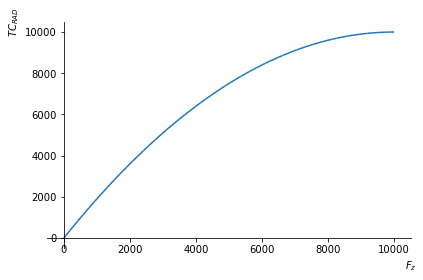

In [4]:
from sympy.plotting import plot

# We aren't going to do symbolic sums using the min/max values
# so we don't need to define them as symbols in this case
# We can just declare normal Python variables
F_z_min = 0
F_z_max = 10000

plot(TC_RAD, (F_z, F_z_min, F_z_max), xlabel='$F_z$', ylabel='$TC_{RAD}$');

We can also make a interactive plot that allows us to explore the effect of changing the $k_a$ and $k_b$ parameter values:

In [5]:
from ipywidgets import interact

# Unfortunately, the default slider widget does not show small numbers...
@interact(k_a=(0, 5, 0.1),
          k_b=(1e-5,1e-4, 5e-6))
def charter(k_a=2, k_b=5e-5):
    TC_RAD = k_a *(1-k_b * F_z) * F_z
    plot(TC_RAD, (F_z, F_z_min, F_z_max), xlabel='$F_z$', ylabel='$TC_{RAD}$',
         title=f'$k_b$={k_b}');


interactive(children=(FloatSlider(value=2.0, description='k_a', max=5.0), FloatSlider(value=5e-05, description…

We can expliclty define a log slider plot that is a bit more sensitve in its display; note that by defining the plot, we can also control the label that is displayed:

In [6]:
import ipywidgets as widgets

k_b_slider = widgets.FloatLogSlider(
    value=-5, # This is the power of the initial value
    base=10,
    min=-5, max=-4, # limits are powers
    step=0.01,
    description='$k_b$:'
)


interact(charter, k_b=k_b_slider);

interactive(children=(IntSlider(value=2, description='k_a', max=6, min=-2), FloatLogSlider(value=1e-05, descri…

The article suggests differentiating the equation for $TC_{RAD}$ and then solving by setting the result to zero.

We can differentiate expression by asking *sympy* to differentiate the equation for us:

In [13]:
from sympy import diff

# Redefine the symbols
TC_RAD, F_z, k_a, k_b = symbols('TC_RAD F_z k_a k_b')

# Specify the desired k_a
k_a = 5e-5

# Redefine the equation
TC_RAD = k_a *(1-k_b * F_z) * F_z

# Differentiate with respect to load, F_z
diff(TC_RAD, F_z)

-0.0001*F_z*k_b + 5.0e-5

And then we can solve it automatically as well:

In [14]:
from sympy import solve

solve(diff(TC_RAD, F_z))

[{F_z: 0.5/k_b}]

The result is a list of possible solutions (in Pyhton, a list represented by comma separated values in square brackets, `[...]`).

We can extract the first solution (list index `0`) and display it:

In [15]:
solve(diff(TC_RAD, F_z))[0][F_z]

0.5/k_b

This gives $F_z=0.5/k_b$ which is the same as the expression for Equation 2 in the article:

$L_p=\frac{1}{2.k_b}$

The article then identifies the maximum traction circle radius as:

$TC_{RAD\_MAX}=\frac{k_a.L_P}{2}$

One of the major problems with maths notation used in Racecar Engineering magazine articles is that the symbols are often used inconsistently; for example, is $L_P$ of equation 3 intended to be the same as the previously derived $L_p$ from equation 2? As another example of notational ambiguity, in table 1, the value of $k_b$ is given as `5.0e-5 (1/N)`; the `(1/N)` component is presumably referring to the units rather than an unexplained part of the equation referring to some undeclared quantity `N`? (Many articles are all but impossible to follow without a lot of mental gymnastics trying to make sense of the garbled notation...)

Moving on in the article, equation 4 provides expressions for determining front and rear cornering speeds using quantities:

- $F_{xf}$: deduced front lateral force derived from equation 1;
- $F_{yr}$: deduced rear lateral force derived from equation 1;
- $wdf$: front weight distribution (per cent / 100);
- $m_t$: total car mass (kg);
- $iR$: peak corner curvature (1/m);
- $V_x$: cornering speed (m/s).



In [19]:
F_xf, F_yr, wdf, m_t, iR, V_x = symbols('F_xf F_yr wdf m_t iR V_x')

F_xf = wdf * m_t * iR * V_x**2
F_yr = (1 - wdf) * m_t * iR * V_x**2

The article then gives a view of a whole host of other settings in an Excel worksheet but no formulas to show how they gerneate the claimed results also show in the worksheet.

In all the years I've read Racecar Engineer, I'm not sure I can recall a single article with a mathematical basis that I could replicate all the various elements myself... And this one is no different!